# Pymaceuticals Inc.
---

### Analysis

- Looking at the Sumary Statistics table of all of the different drugs, it is apparent that Capomulin and Ramicane have a significantly lower mean tumor volume and variance. Using the bar chart they also have the largest mice count using their drug. The distribution of male and female mice seem to be about equal so their is no outstanding focus on one or the other. With the results of the boxplot it is safe to assume Capumulin and Ramicane have the best results as far as smallest Final Tumor Volume which would mean they were more effective given that all the mice had the same relative beginning tumor size for every different drug.
- Taking a deeper look into Capumulin, there is a pretty steady decrease in tumor volume between days 20 and 35 with slight increases from 0 to 20 days and 35 to 40 days. This could be from the drug wearing off at around day 35 and another/higher dose being required. Also their is a strong correlation between weight of the mouse and the size of the tumor.
 

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study result
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df=pd.merge(study_results, mouse_metadata, on='Mouse ID', how='outer')

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate= merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df=merge_df.loc[merge_df['Mouse ID']=='g989',:]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df.loc[merge_df['Mouse ID']!= 'g989',:]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
st_dev=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_df=pd.DataFrame({'Mean Tumor Volume':mean, 'Median Tumor Volume':median, 'Tumor Volume Variance':variance, 'Tumor Volume st. dev.':st_dev,
                         'Tumor Volume st. err.':sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume st. dev.,Tumor Volume st. err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_df2= clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Mice Count per Drug Regimen')

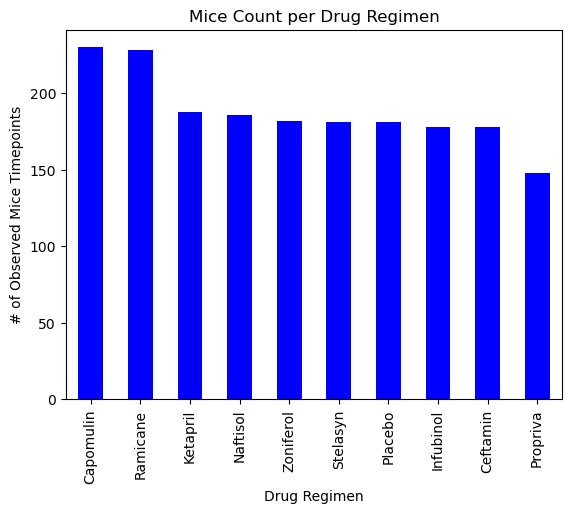

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count=clean_df['Drug Regimen'].value_counts()
bar_p=mice_count.plot(kind='bar', color='blue')
plt.ylabel('# of Observed Mice Timepoints')
plt.title('Mice Count per Drug Regimen')

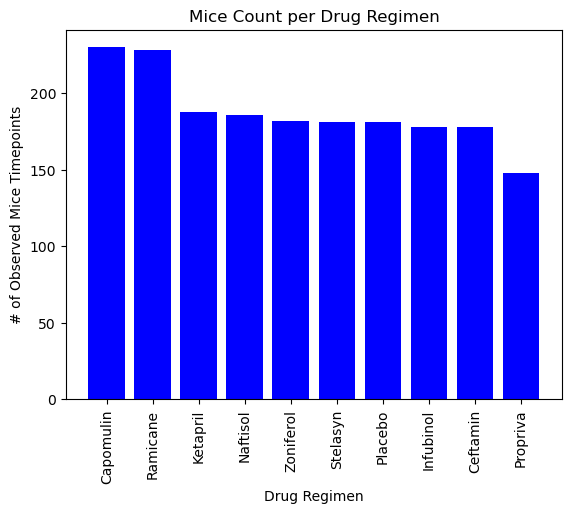

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=mice_count.index.values
y_axis=mice_count.values
plt.bar(x_axis, y_axis, color='blue', align='center')
plt.xticks(rotation="vertical")
plt.title('Mice Count per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel("# of Observed Mice Timepoints")
plt.show()

Text(0, 0.5, 'Sex')

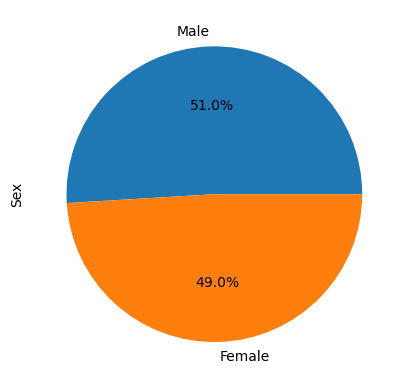

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex=clean_df['Sex'].value_counts()
labels=['Male', 'Female']
pie_p=sex.plot(kind='pie', labels=labels, autopct= "%1.1f%%")
plt.ylabel('Sex')

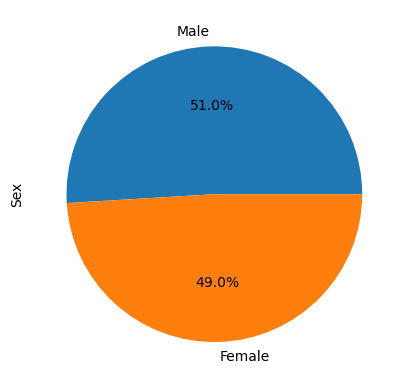

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex, labels=labels, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max = clean_df.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
group_df2=pd.merge(clean_df, max, on=['Mouse ID', 'Timepoint'])
group_df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [52]:
# Put treatments into a list for for loop (and later for plot labels)

treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]
i=0
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen1=group_df2.loc[group_df2['Drug Regimen']==treatment,:]
    tumor_vol.append(regimen1['Tumor Volume (mm3)'])
    # add subset 
    quartile = tumor_vol[i].quantile([.25,.5,.75])
    lowerq = quartile[0.25]
    upperq = quartile[0.75]
    IQR = upperq-lowerq
    # Determine outliers using upper and lower bounds
    lower_b = lowerq - (1.5*IQR)
    upper_b = upperq + (1.5*IQR)
    i=i+1
    print(f"{treatment}'s potential outliers: Below {lower_b} Above {upper_b}")

Capomulin's potential outliers: Below 20.70456164999999 Above 51.83201549
Ramicane's potential outliers: Below 17.912664470000003 Above 54.30681135
Infubinol's potential outliers: Below 36.83290494999999 Above 82.74144559000001
Ceftamin's potential outliers: Below 25.355449580000002 Above 87.66645829999999


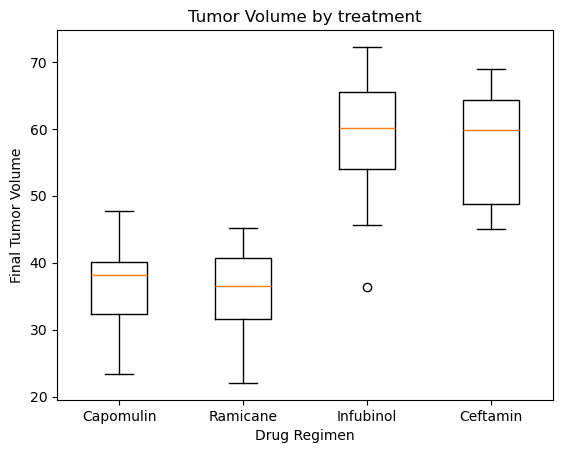

In [58]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels=treatments, vert=True)
plt.title('Tumor Volume by treatment')
plt.ylabel('Final Tumor Volume')
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, ' Tumor volume (mm3)')

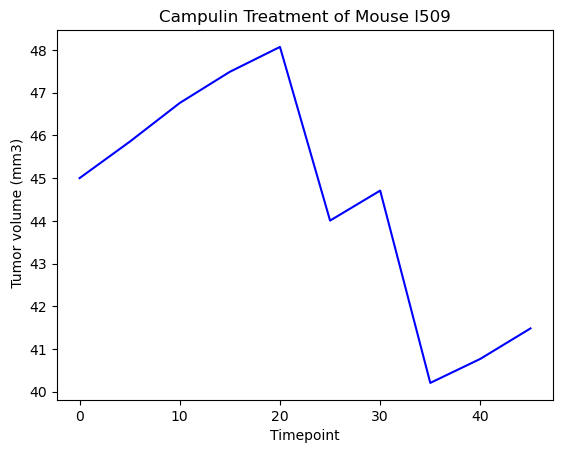

In [73]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
l509 = clean_df.loc[clean_df['Mouse ID'] == 'l509']
tumor = l509["Tumor Volume (mm3)"]
time = l509["Timepoint"]
plt.plot(time, tumor, color='blue')
plt.title( "Campulin Treatment of Mouse l509")
plt.xlabel("Timepoint")
plt.ylabel(" Tumor volume (mm3)")

Text(0, 0.5, 'Average Tumor volume')

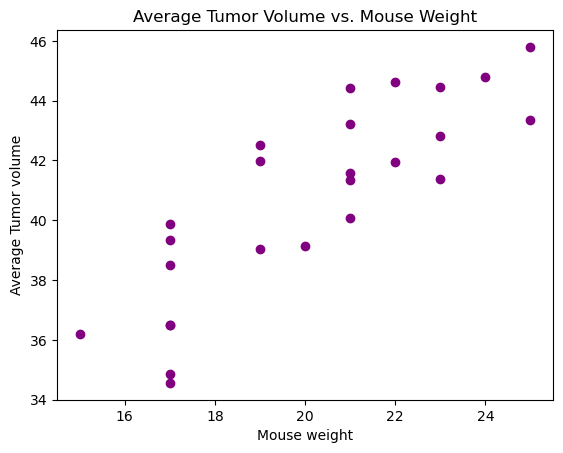

In [82]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_m =capomulin.groupby(["Mouse ID"])
avg_w = capomulin_m["Weight (g)"].mean()
avg_t = capomulin_m["Tumor Volume (mm3)"].mean()

plt.scatter(avg_w, avg_t, color='purple')
plt.title( "Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse weight")
plt.ylabel("Average Tumor volume")

## Correlation and Regression

PearsonRResult(statistic=0.8419363424694721, pvalue=1.3225722434712388e-07)


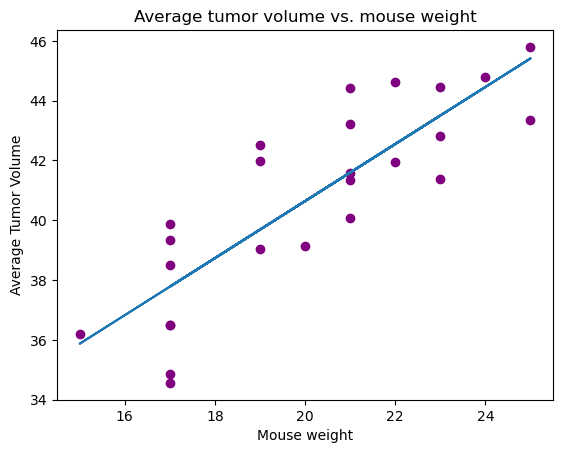

In [94]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = st.pearsonr(avg_w,avg_t)
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_w, avg_t)
rvalues = avg_w * slope + intercept

plt.scatter(avg_w, avg_t, color='purple')
plt.plot(avg_w, rvalues)
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight")
plt.ylabel("Average Tumor Volume")
print(corr)